# Notebook activity 5.8 Fitting a multiple regression model

In Notebook activities 5.6 and 5.7, we investigated the possibility of fitting simple linear regression models for the response `medals` - the number of medals won by nations at a summer Olympics - using data for the summer Olympics for the years 1996, 2000, 2004, 2008, 2012 and 2016. 

In those notebook activities, we found that whilst using `lagMedals` (the number of medals won at the previous Olympics) as a covariate the model seemed to fit well, neither of the covariates `population` (the population size, in millions for the year of the previous Olympics) or `gdp` (the GDP per capita for the year of the previous Olympics, in thousands, relative to the US dollar in 2010) appeared as if they would lead to simple linear regression models that fitted well.

In this notebook activity, we'll see if we can come up with a better model by using multiple regression.

The data are stored in the `olympic` data frame.

## (a) Getting started

### (i)

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the wages data frame
data(olympic)
# Check the data frame has loaded OK
head(olympic)

## (b) Fitting the full model

In this part we will explore an initial multiple regression model. This model will include the three covariates already mentioned: `lagMedals`, `population`, `gdp`. We will also include the following transformations of two of these covariates:

* `logPopulation` which is defined as `log(population)`, and
* `logGdp` which is defined as `log(gdp)`.

These correspond to transformations that were considered in Notebook activity 5.7.

### (i)

Use the empty code cell below to create two new variables `logPopulation` and `logGdp`.

#### Solution <a class="tocSkip">

The required code is given below. Note that running this code will not produce any output.

In [2]:
#Creating the new variables
logPopulation <- log(olympic$population)
logGdp <- log(olympic$gdp)

###  <a class="tocSkip">

For this notebook activity we will take the model including `lagMedals`, `population`, `gdp`, `logPopulation`
and `logGdp` to be the full model. 

### (ii)

Use the empty code cell below to fit the full model, storing the results in an object called `medalsFullModel`. Display a summary for the results from fitting this model. (Look back at Notebook activity 2.1 if you need a reminder of how to do this.)

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [3]:
medalsFullModel <- lm(medals ~ lagMedals + population + gdp + logPopulation + 
                      logGdp, data = olympic)
summary(medalsFullModel)


Call:
lm(formula = medals ~ lagMedals + population + gdp + logPopulation + 
    logGdp, data = olympic)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.878  -0.589  -0.077   0.352  35.674 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.3054550  0.1815882  -1.682  0.09284 .  
lagMedals      0.9510596  0.0094491 100.651  < 2e-16 ***
population     0.0026426  0.0009106   2.902  0.00379 ** 
gdp            0.0029195  0.0077796   0.375  0.70753    
logPopulation  0.1542193  0.0570298   2.704  0.00696 ** 
logGdp         0.1963213  0.1104767   1.777  0.07585 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.278 on 1063 degrees of freedom
Multiple R-squared:  0.9409,	Adjusted R-squared:  0.9406 
F-statistic:  3384 on 5 and 1063 DF,  p-value: < 2.2e-16


### (iii)

Using the summary you produced in part (ii), which variables in the full model appear to be important?

#### Solution <a class="tocSkip">

Looking at the $p$-values associated with the variables given in the table, they split into three groups: 

* `lagMedals`, `population` and `logPopulation` all have sufficiently small $p$-values associated with them to indicate that they are important in the model. 
* `gdp` has a very large $p$-value, indicating that it is not making much of a contribution to the model. 
* `logGdp` has a $p$-value approximately equal to 0.08, a value which *might* be regarded as indicating that `logGdp` should be included in the model (depending on how 'small' the $p$-value needs to be to be considered 'significant' for these data). 

## (c) Fitting the null model

In this part we will fit the null model that only contains the intercept and no explanatory variables. 

### (i)

Use the empty code below to fit the null model for the response variable `medals`, storing the results in an object called `medalsNullModel`. Display a summary of the results from fitting the model.  (Look back at Notebook activity 2.7 if you need a reminder of how to do this.)

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [4]:
medalsNullModel <- lm(medals ~ 1, data = olympic)
summary(medalsNullModel)


Call:
lm(formula = medals ~ 1, data = olympic)

Residuals:
    Min      1Q  Median      3Q     Max 
 -4.992  -4.992  -4.992  -0.992 116.008 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.9916     0.4114   12.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.45 on 1068 degrees of freedom


## (d) Using stepwise regression

In this part we will use stepwise regression to find a parsimonious model.

### (i)

Run the code below to use both forward and backward stepwise regression, starting from the null model, to find a parsimonious model that includes some, or all, of the variables: `lagMedals`, `population`, `gpd`, `logPopulation` and `logGdp`.

In [ ]:
step(medalsNullModel, direction = "both", 
     scope = list(lower = medalsNullModel, upper = medalsFullModel))

### (ii)

Which variables are included in the model selecting in part (i)?

#### Solution <a class="tocSkip">

The selected model is `medals ~ lagMedals + population + logGdp + logPopulation`.

This model includes all of the explanatory variables from the full model, with the exception of `gdp`. Note that `gdp` features just as `log(gdp)` whereas `population` features both in its untransformed form and logged.

### (iii)

Use the empty cell below to run both forward and backward stepwise regression again, starting from the *full* model.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [6]:
step(medalsFullModel, direction = "both", 
     scope = list(lower = medalsNullModel, upper = medalsFullModel))

Start:  AIC=2544.57
medals ~ lagMedals + population + gdp + logPopulation + logGdp

                Df Sum of Sq    RSS    AIC
- gdp            1         2  11427 2542.7
<none>                        11425 2544.6
- logGdp         1        34  11459 2545.7
- logPopulation  1        79  11504 2549.9
- population     1        91  11516 2551.0
- lagMedals      1    108884 120310 5059.3

Step:  AIC=2542.71
medals ~ lagMedals + population + logPopulation + logGdp

                Df Sum of Sq    RSS    AIC
<none>                        11427 2542.7
+ gdp            1         2  11425 2544.6
- logPopulation  1        78  11505 2548.0
- population     1        91  11518 2549.2
- logGdp         1       102  11528 2550.2
- lagMedals      1    108886 120312 5057.3



Call:
lm(formula = medals ~ lagMedals + population + logPopulation + 
    logGdp, data = olympic)

Coefficients:
  (Intercept)      lagMedals     population  logPopulation         logGdp  
    -0.312412       0.951029       0.002651       0.153237       0.227141  


### (iv)

Is the final model from part (iii) the same as the final model found in part (i)? If not, in what way do the two models differ, and which one do you feel is the better model? Hence what should be regarded as the parsimonious model?

#### Solution <a class="tocSkip">

Working from the full model results in the *same* final model as we obtained when we worked from the null model. So our parsimonious model is: 

`medals ~ lagMedals + population + logGdp + logPopulation`.

## (e) Exploring the parsimonious model

### (i)

In the empty code cell below, fit the (best) parsimonious model from part (d)(iv), storing the results in  `medalsMLRfit`. Obtain a summary of the results from fitting the model.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [7]:
medalsMLRFit <- lm(medals ~ lagMedals + population + logGdp + logPopulation, 
                    data = olympic)
summary(medalsMLRFit)


Call:
lm(formula = medals ~ lagMedals + population + logGdp + logPopulation, 
    data = olympic)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.906  -0.570  -0.078   0.344  35.658 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.312412   0.180566  -1.730  0.08389 .  
lagMedals      0.951029   0.009445 100.692  < 2e-16 ***
population     0.002651   0.000910   2.913  0.00365 ** 
logGdp         0.227140   0.073867   3.075  0.00216 ** 
logPopulation  0.153237   0.056947   2.691  0.00724 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.277 on 1064 degrees of freedom
Multiple R-squared:  0.9409,	Adjusted R-squared:  0.9407 
F-statistic:  4233 on 4 and 1064 DF,  p-value: < 2.2e-16


### (ii)

Interpret the coefficients for the parsimonious model you fitted in part (e)(i). Does the model make sense to you?

#### Solution <a class="tocSkip">

All of the coefficients are positive, suggesting that for each of these variables, higher values are associated with more medals won at the Olympics (after adjusting for the other explanatory variables). 

The coefficient for `lagMedals` is close to the value 1. So, even after adjusting for the other explanatory variables, we get the same result as we did in the corresponding simple linear regression model: the model suggests that, for every extra medal a country won at the previous summer Olympics, we'd expect that the number of medals they win to go up by 1.

### (iii)

Use the empty code below to obtain diagnostic plots for the model that you fitted in part (e)(i). 

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

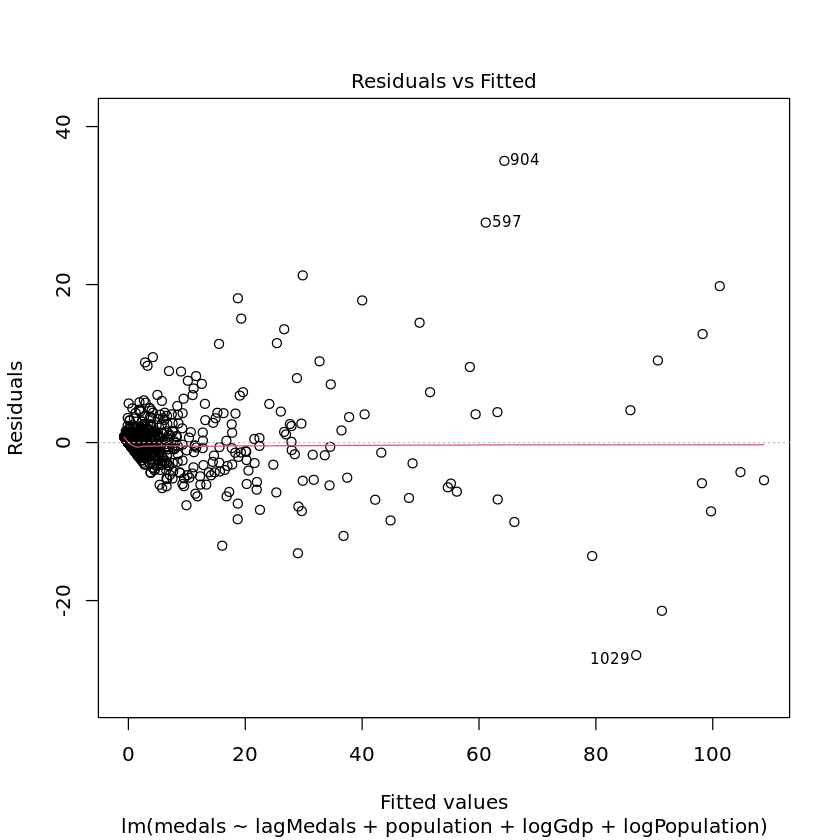

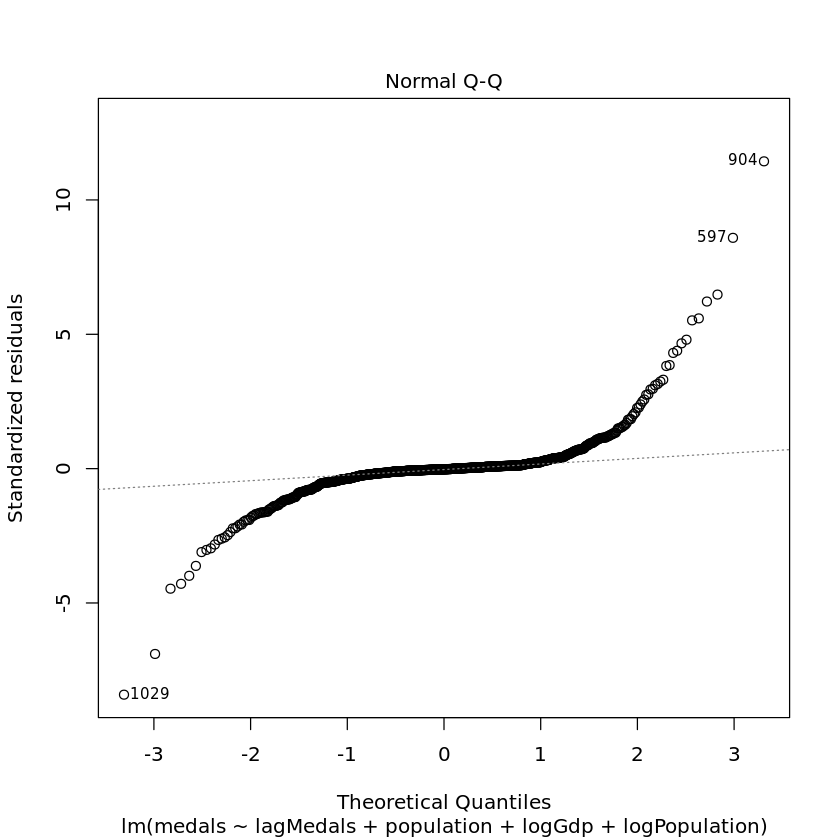

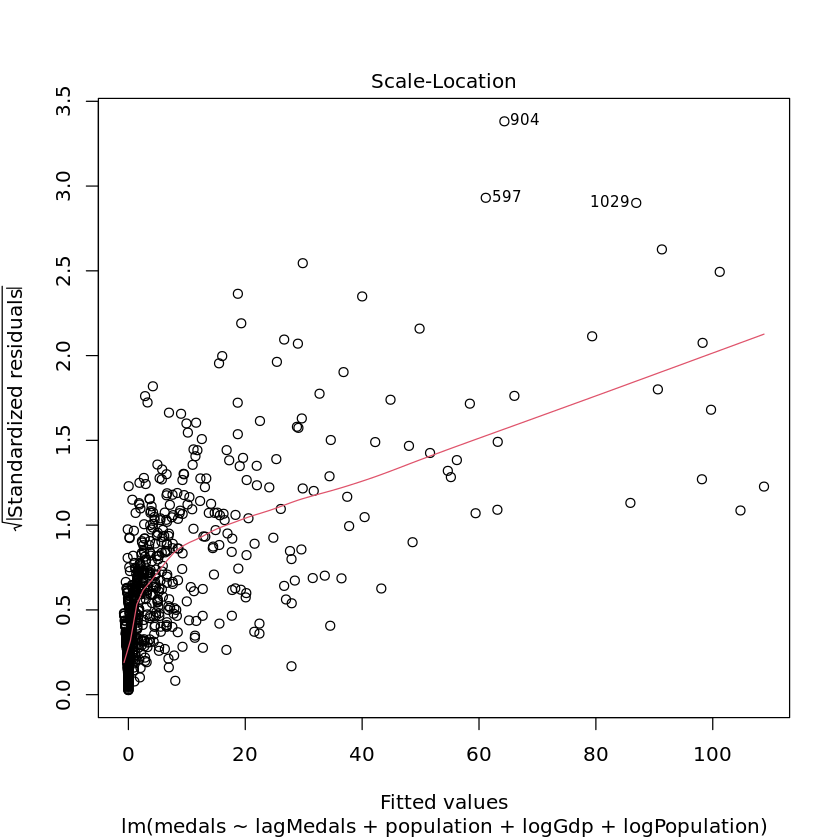

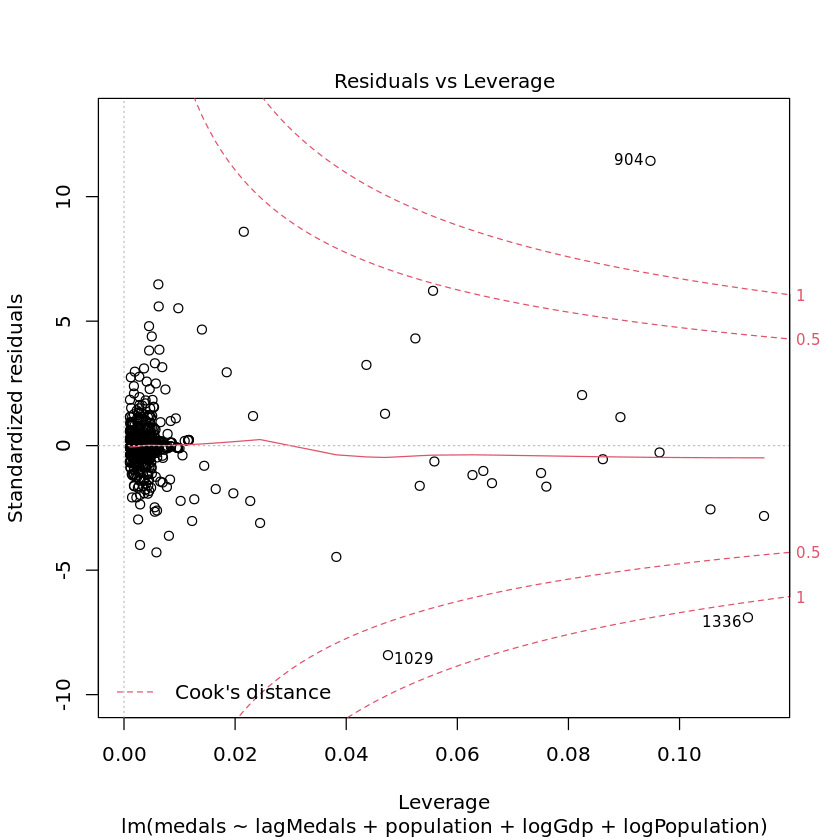

In [8]:
plot(medalsMLRFit)

### (iv)

Based on the plots you obtained in part (e) (iii), does the parsimous model you used in part (e)(i) fit the data well? Why or why not?

#### Solution <a class="tocSkip">

The residuals versus fitted plot looks reasonable, although there is a slight suggestion that the variance increases when moving from very small fitted values to larger values. This can be seen even more clearly in the scale-location plot where an upward trend is evident. So, it may not be reasonable to make the assumption of constant variance.

The normal probability plot is also problematic since it is most definitely not straight! This casts doubt on the assumption that the residuals are normally distributed.

On the other hand, the residual-leverage plot looks reasonable. There are a few observations with high leverage, but generally they do not have large residuals. So, only a few observations are marked out as having large Cook statistics. 

Overall, although the normality and constant variance assumptions look dubious, there are aspects of the model which seem to be OK and the model fit could be a lot worse!